# ACA ESTA FUNCIONES.PY


In [52]:
"""

Trabajo Práctico 1 - Implementacion de funciones

Álgebra Lineal Computacional - 2do cuatrimestre 2024

Grupo: TIBURONES

Integrantes:
- Victoria Pérez Olivera
- Ignacio Gallego
- Evangelina Fomina

"""


#CONTENIDO TP1

import numpy

def calcularLU(A):
    """
    Calcula la descomposición LU de una matriz cuadrada A.

    Parámetros:
    A : numpy.ndarray
        Matriz cuadrada que se desea descomponer.

    Retorna:
    L : numpy.ndarray
        Matriz triangular inferior.
    U : numpy.ndarray
        Matriz triangular superior.
    P : numpy.ndarray
        Matriz de permutación utilizada en el proceso de descomposición.
    """
    m = A.shape[0]  # Número de filas de A
    n = A.shape[1]  # Número de columnas de A

    U = A.copy()  # Copia de A para realizar la descomposición
    U = U.astype(float)  # Asegura que U sea de tipo float

    if m != n:
        print('Matriz no cuadrada')  # Verifica que la matriz sea cuadrada
        return

    P = numpy.eye(n)  # Matriz de permutación inicial (identidad)
    L = numpy.eye(n)  # Matriz triangular inferior inicial (identidad)
    L = L.astype(float)  # Asegura que L sea de tipo float

    for i in range(n):
        Pj = numpy.eye(n)  # Matriz de permutación para la columna actual

        # Si el pivote es cero, se busca una fila para intercambiar
        if U[i, i] == 0:
            for j in range(i + 1, n):
                if U[j, i] != 0:  # Se encuentra un pivote no cero
                    Pj[i, :] += Pj[j, :]  # Intercambio de filas
                    Pj[j, :] = Pj[i, :] - Pj[j, :]
                    Pj[i, :] -= Pj[j, :]
                    P = Pj @ P  # Actualiza la matriz de permutación
                    break
                elif j == n - 1:
                    print('Todos los coeficientes de esta columna son 0')
                    break

        U = Pj @ U  # Aplica la permutación a U
        L = Pj @ L @ Pj  # Actualiza L con la permutación

        # Eliminación hacia adelante
        for j in range(i + 1, n):
            factor = U[j, i] / U[i, i]  # Calcula el factor de eliminación
            L[j, i] = factor  # Almacena el factor en L
            U[j, i:] = U[j, i:] - factor * U[i, i:]  # Actualiza U

    return L, U, P  # Retorna las matrices L, U y P

def inversaLU(L, U, P):
    """
    Calcula la inversa de una matriz utilizando la descomposición LU.

    Parámetros:
    L : numpy.ndarray
        Matriz triangular inferior.
    U : numpy.ndarray
        Matriz triangular superior.
    P : numpy.ndarray
        Matriz de permutación utilizada en el proceso de descomposición.

    Retorna:
    numpy.ndarray
        Matriz inversa de la matriz original.
    """
    return invertir(U) @ invertir(L) @ P  # Retorna la inversa calculada

def leontiefizar(A):
    """
    Calcula la matriz Leontief a partir de la matriz insumo-producto A.

    Parámetros:
    A : numpy.ndarray
        Matriz insumo-producto que se desea transformar.

    Retorna:
    numpy.ndarray
        Matriz Leontief resultante.
    """
    n = A.shape[0]  # Número de sectores (filas de A)
    I_A = numpy.eye(n) - A  # Matriz identidad menos A
    Low, Up, P = calcularLU(I_A)  # Descomposición LU de I - A
    return inversaLU(Low, Up, P)  # Retorna la inversa de la matriz resultante

'''
FUNCIONES AUXILIARES
'''

def invertir(M):
    """
    Calcula la inversa de una matriz M utilizando eliminación de Gauss.

    Parámetros:
    M : numpy.ndarray
        Matriz que se desea invertir.

    Retorna:
    numpy.ndarray
        Matriz inversa de M.
    """
    A = numpy.copy(M)  # Copia de la matriz original
    A = A.astype(float)  # Asegura que A sea de tipo float

    A_aug = numpy.hstack((A, numpy.eye(A.shape[0])))  # Matriz aumentada
    A_inv = sustHaciaAtras(triangularizarU(A_aug))  # Aplicar sustitución hacia atrás en U

    return A_inv  # Retorna la matriz inversa

def sustHaciaAtras(A_aug):
    """
    Realiza la sustitución hacia atrás sobre una matriz aumentada.

    Parámetros:
    A_aug : numpy.ndarray
        Matriz aumentada que se desea resolver.

    Retorna:
    numpy.ndarray
        Parte de la matriz que contiene la solución.
    """
    n = A_aug.shape[0]  # Número de filas

    for i in range(n - 1, -1, -1):
        A_aug[i] = A_aug[i] / A_aug[i, i]  # Normaliza la fila actual

        for j in range(i):
            A_aug[j] -= A_aug[i] * A_aug[j, i]  # Elimina la variable de la fila j

    return A_aug[:, n:]  # Retorna solo la parte de solución

def triangularizarU(M):
    """
    Transforma una matriz M en forma triangular superior.

    Parámetros:
    M : numpy.ndarray
        Matriz que se desea triangularizar.

    Retorna:
    numpy.ndarray
        Matriz triangular superior resultante.
    """
    A = numpy.copy(M)  # Copia de la matriz original
    A = A.astype(float)  # Asegura que A sea de tipo float

    f, c = A.shape  # Obtiene el número de filas y columnas
    if f == 0 or c == 0:
        return A  # Retorna la matriz vacía si no hay filas o columnas

    i = 0

    # Encuentra la primera fila no cero
    while i < f and A[i, 0] == 0:
        i += 1

    if i == f:
        B = triangularizarU(A[:, 1:])  # Recursión si no se encuentra fila no cero
        return numpy.block([A[:, :1], B])  # Retorna matriz con columna inicial

    if i > 0:
        A[[0, i], :] = A[[i, 0], :]  # Intercambia filas si es necesario

    # Realiza eliminación hacia adelante
    A[1:, :] -= (A[0, :] / A[0, 0]) * A[1:, 0:1]

    B = triangularizarU(A[1:, 1:])  # Llama recursivamente para triangularizar el resto

    return numpy.block([[A[:1, :]], [A[1:, :1], B]])  # Retorna la matriz triangular superior


#CONTENIDO TP2


def metodoPotencia(A, v, k):
    v = v / np.linalg.norm(v, 2)

    for i in range(k):
        Av = A @ v
        v = Av / np.linalg.norm(Av, 2)
        l = v.T@A@v
    return (l)



def metodoMonteCarlo(A,k):
    avals = np.zeros(k)

    for i in range(k):
        v = np.random.rand(A.shape[0])
        l=metodoPotencia(A, v, k)
        avals[i]=l
    return avals.mean().round(4), avals.std().round(4)











def metodoPotenciaVectores(A, v, k):
    vectores = []
    for i in range(k):
        Av = A @ v
        v = Av / np.linalg.norm(Av, 2)
        vectores.append(v)
    return (v, vectores)




In [53]:
import numpy as np
import pandas as pd
from scipy.linalg import norm
import matplotlib.pyplot as plt

# ACA EMPIEZA LA RESO DEL TP

### Consigna 1

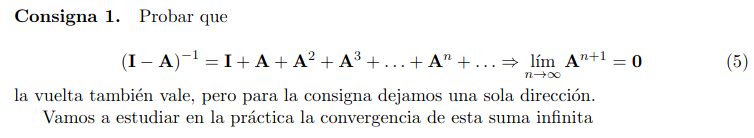

### Consigna 2 <font color="green">YA ESTÁ</font>

Calculo las normas de A1 y A2 elevados de 1 a 250

In [54]:
#Defino la matriz A1
A1 = np.array([
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.303, 0.256, 0.323, 0.225, 0.257]
])

#Defino la matriz A2

A2 = np.array([
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
])


In [55]:
I = np.eye(5)
#Defino las listas de normas
a1 = []
a2 = []
Ak1 = I
Ak2 = I
for i in range(250):
    Ak1 = A1 @ Ak1
    a1.append(norm(Ak1, 2))

    Ak2 = A2 @ Ak2
    a2.append(norm(Ak2, 2))



In [56]:
arr=np.arange(1,251)

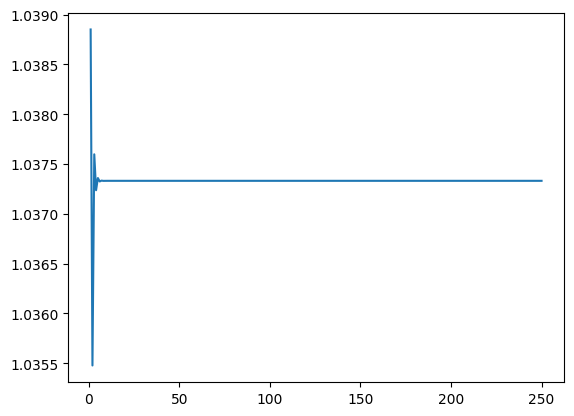

In [57]:
plt.plot(arr, a1)

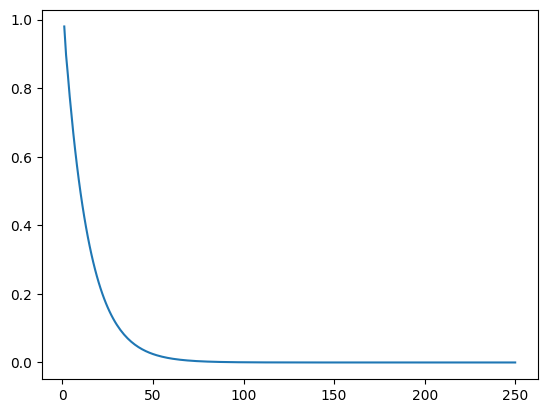

In [58]:
plt.plot(arr, a2)

### Consigna 3 <font color="green">YA ESTÁ</font>



Busco mayores autovalores de las matrices A1 y A2 usando el metodo de la potencia

In [59]:




  ## AGREGAR AL FUNCIONES.PY

In [60]:
# Número de iteraciones
k = 250

# Para la matriz A1
avalA1prom, avalA1desv = metodoMonteCarlo(A1,k)

# Para la matriz A2
avalA2prom, avalA2desv = metodoMonteCarlo(A2,k)



Hago una tabla de comparacion de promedio y desvio estandar de vectores de las matrices A1 y A2

In [61]:
t = {"Promedio" : [avalA1prom, avalA2prom], "Desvio estandar" : [avalA1desv, avalA2desv]}
tabla = pd.DataFrame(data = t, index = ["A1", "A2"])
tabla

,Promedio,Desvio estandar
A1,1.0000,0.0
A2,0.9277,0.0


### Consigna 4 <font color="red">REVISAAAAAAAAAAAAAAAAAAAAAAARRRRRRRRRRRRRRRRRR</font>

**A**     Graficamos la serie de potencias de (I-A)<sup>-1</sup>

In [66]:
leon1

array([[-7.15934558e+15, -7.15934558e+15, -7.15934558e+15,
        -7.15934558e+15, -7.15934558e+15],
       [-6.58856504e+15, -6.58856504e+15, -6.58856504e+15,
        -6.58856504e+15, -6.58856504e+15],
       [-6.38981889e+15, -6.38981889e+15, -6.38981889e+15,
        -6.38981889e+15, -6.38981889e+15],
       [-3.43325860e+15, -3.43325860e+15, -3.43325860e+15,
        -3.43325860e+15, -3.43325860e+15],
       [-9.00719925e+15, -9.00719925e+15, -9.00719925e+15,
        -9.00719925e+15, -9.00719925e+15]])

In [75]:
#Generamos las matrices

leon1=invertir(np.eye(5)-A1)
leon2=leontiefizar(A2)

#hallo la serie de potencias

leonk1=np.eye(5)
leonk2=np.eye(5)
l1=[]
l2=[]


for i in range(18):
    leonk1 = leon1 @ leonk1
    l1.append(norm(leonk1, 2))

for i in range(250):

    leonk2 = leon2 @ leonk2
    l2.append(norm(leonk2, 2))

print(l1)


[3.3794386135941236e+16, 1.1009598432709496e+33, 3.586727605050591e+49, 1.1684908392854004e+66, 3.8067313491308205e+82, 1.2401640712320491e+99, 4.040229747040118e+115, 1.3162336167867867e+132, 4.2880505377914166e+148, 1.3969691383161034e+165, 4.5510722324946705e+181, 1.4826568388153832e+198, 4.830227228630564e+214, 1.5736004764828276e+231, 5.126505115348423e+247, 1.6701224415256045e+264, 5.440956181505479e+280, 1.7725648990154492e+297]


Graficamos para (I-A1)<sup>-1</sup>

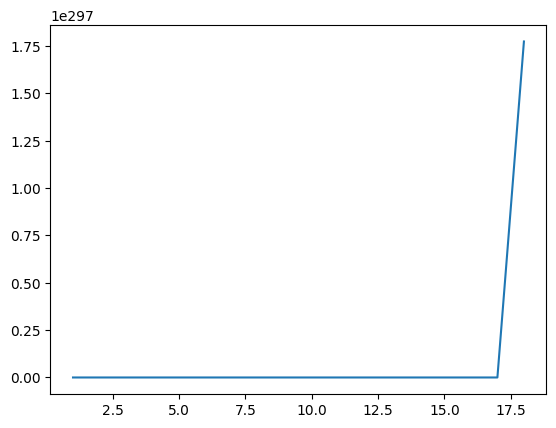

In [72]:
plt.plot(arr[:18], l1)

Graficamos para (I-A2)<sup>-1</sup>

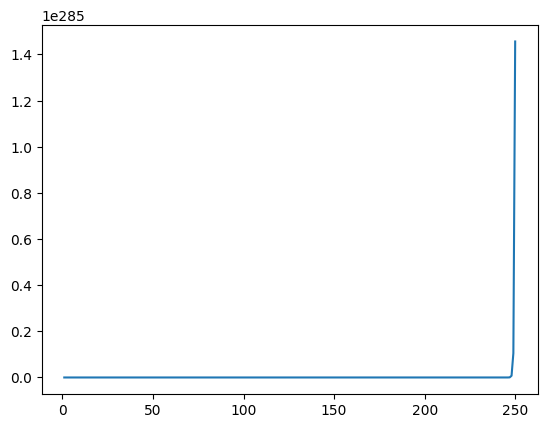

In [68]:
plt.plot(arr, l2)

### Consigna 5

# Análisis en componentes principales

### Consigna 6

### Consigna 7

### Consigna 8

# Matriz H

### Consigna 9

### Consigna 10

### Consigna 11

In [ ]:
# Calculamos autovalores exactos para comparar
autovalores1, autovectores1 = np.linalg.eig(A1)

print("Autovalor 1 aproximado:", autovalor1)
print("Autovalores exactos de A1:", autovalores1)
# Guardamos en las variables promedio y desvio estandar
lista_vectores1 = metodoPotencia(A1, v, k)[1]
promedio1 = np.mean(lista_vectores1, axis = 0)
desvio1 = np.std(lista_vectores1, axis = 0)

In [ ]:
# Número de iteraciones
k = 250
v = np.array([1, 2, 3, 4, 5])
#Para la matriz A2
v_normalizado2 = metodoPotencia(A2, v, k)[0]
# Obtenemos el autovalor correspondiente usando el autovector calculado
autovalor2 = np.dot(A1 @ v_normalizado2, v_normalizado2) / np.dot(v_normalizado2, v_normalizado2)

# Calculamos autovalores exactos para comparar
autovalores2, autovectores2 = np.linalg.eig(A2)

print("Autovalor 2 aproximado:", autovalor2)
print("Autovalores exactos de A2:", autovalores2)
# Guardamos en las variables promedio y desvio estandar
lista_vectores2 = metodoPotencia(A2, v, k)[1]
promedio2 = np.mean(lista_vectores2, axis = 0)
desvio2 = np.std(lista_vectores2, axis = 0)